# 🔎 Explanatory Data Analysis

## Data Information

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import join, dirname

# Load the dataset
data_path = join(dirname(os.getcwd()), 'data', 'vitals_raw.txt')
data = pd.read_json(data_path, lines=True)
# Display the first few rows of the dataset
print(data.head())
print('#' * 50)
print(data.info())
print('#' * 50)
print(data.describe())


              event_timestamp        sensor_id  heart_rate  body_temperature  \
0  2026-01-27T13:50:50.771629  icu-monitor-004        70.5             37.07   
1  2026-01-27T13:50:40.771629  icu-monitor-008        77.8             37.18   
2  2026-01-27T13:50:30.771629  icu-monitor-007        63.1             37.88   
3  2026-01-27T13:50:20.771629  icu-monitor-004        91.3             37.73   
4  2026-01-27T13:50:10.771629  icu-monitor-001        91.2             36.55   

   spO2  battery_level  
0    97             41  
1    96             89  
2    96             51  
3    96             45  
4    99             99  
##################################################
<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   event_timestamp   5000 non-null   str    
 1   sensor_id         5000 non-null   str    
 2   heart_rate        4760 non-nul

> Duplicates: 0
> Missing values: event_timestamp       0
sensor_id             0
heart_rate          240
body_temperature      0
spO2                  0
battery_level         0
dtype: int64
> Unique sensors: 10


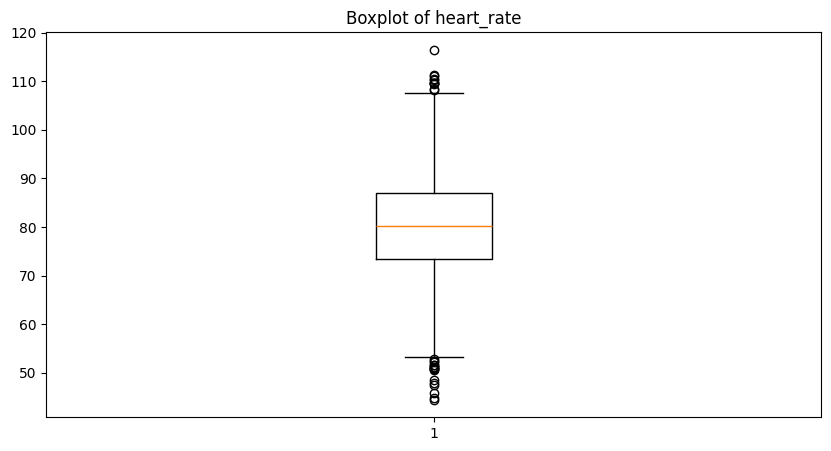

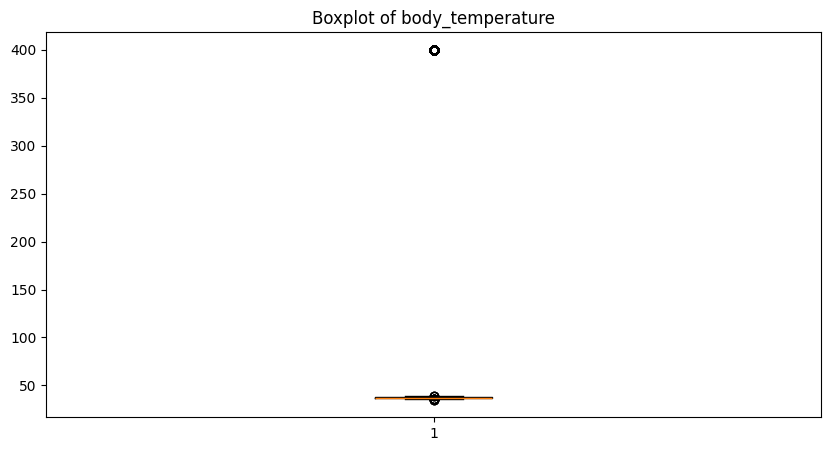

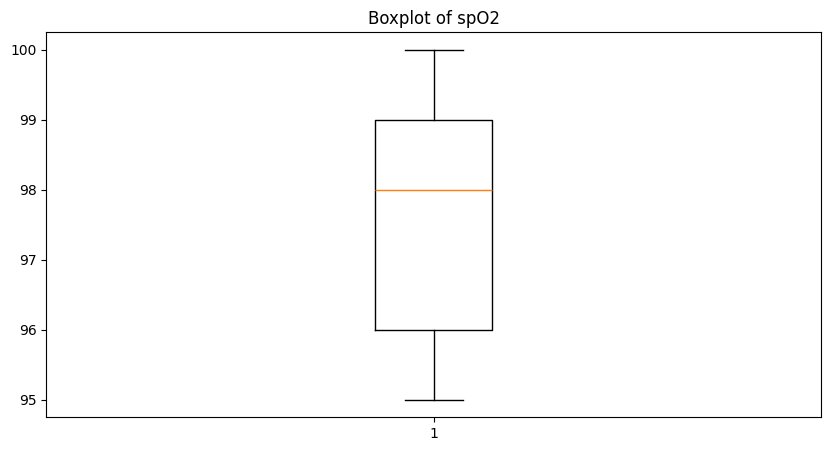

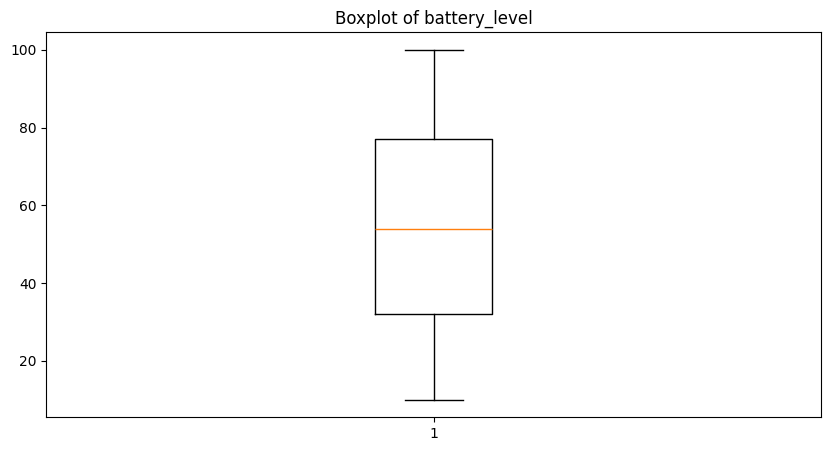

In [49]:
# Check for duplicates
print('> Duplicates:', data.duplicated().sum())
# Check for missing values
print('> Missing values:', data.isnull().sum())
# Check for unique sensors
print('> Unique sensors:', data['sensor_id'].nunique())

# Check for outliers using boxplots
numeric_columns = data.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(data[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.show()

## Data Cleaning

In [50]:
# Parse the timestamp column to datetime
data['event_timestamp'] = pd.to_datetime(data['event_timestamp'], errors='coerce')

# Clamp body temperature values to a reasonable range (27-42.6 degrees Celsius)
data['body_temperature'] = data['body_temperature'].clip(lower=27, upper=42.6)

# Fill in missing heart rate data with a rolling average of the same sensor's previous values
data['heart_rate'] = (
    data.groupby('sensor_id')['heart_rate']
    .transform(lambda x: x.fillna(x.rolling(window=3, min_periods=1).mean()))
)

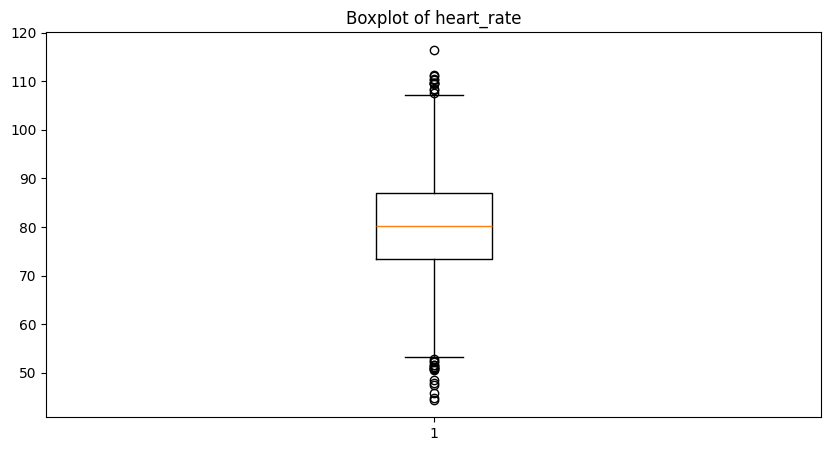

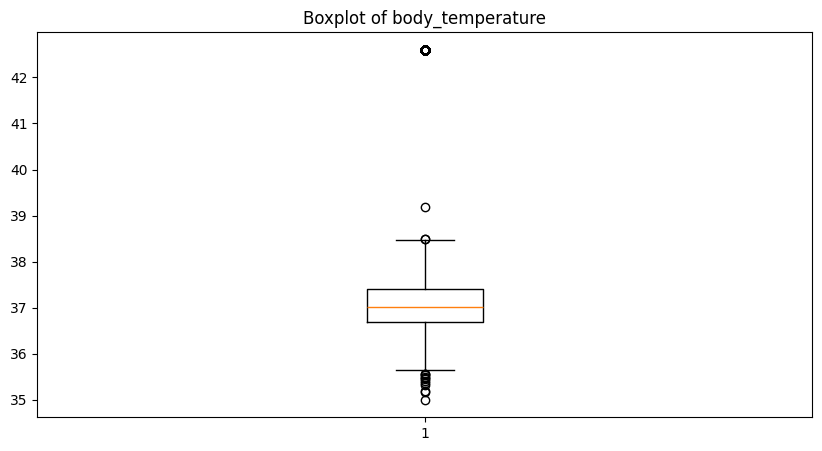

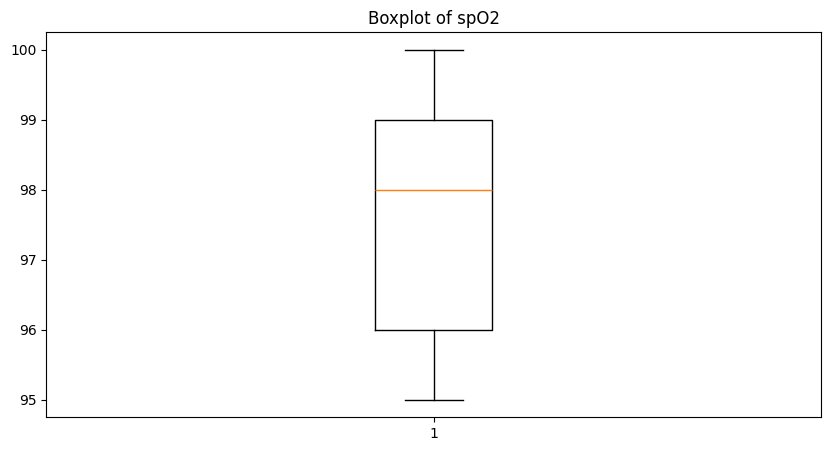

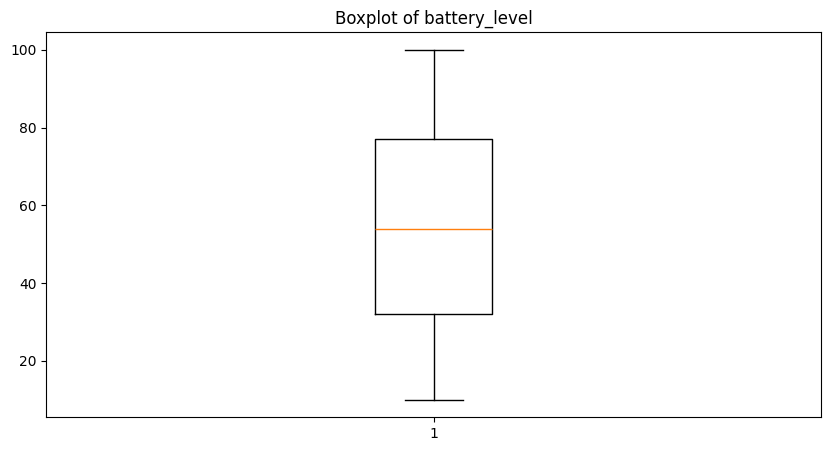

In [51]:
# Check for outliers using boxplots
numeric_columns = data.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(data[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.show()